<a href="https://colab.research.google.com/github/bikashk123/Data-Science-Analytics/blob/master/Task4(visualize_decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task2: Explore Unsupervised Machine Learning  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
iris_data=pd.read_csv('drive/My Drive/Dataset/Iris.csv')

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [ ]:
iris_data.shape

(150, 6)

In [ ]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

#EDA

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


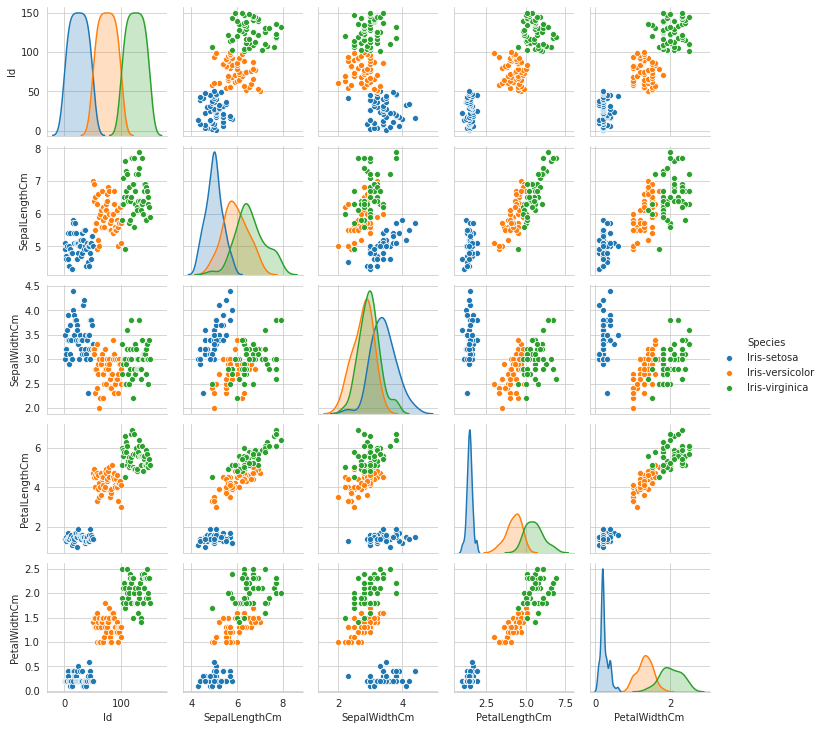

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris_data,hue='Species',size=2)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


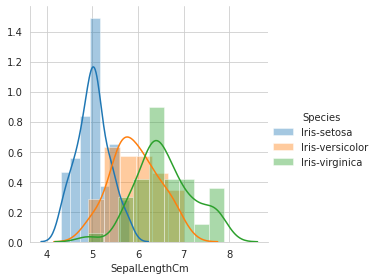

In [ ]:
#Unvariate analysis(SL,SW,PL,PW)
#probability density function
sns.FacetGrid(iris_data,hue='Species',size=4).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


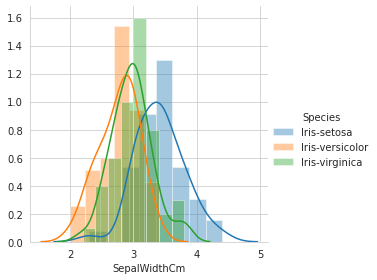

In [ ]:
sns.FacetGrid(iris_data,hue='Species',size=4).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


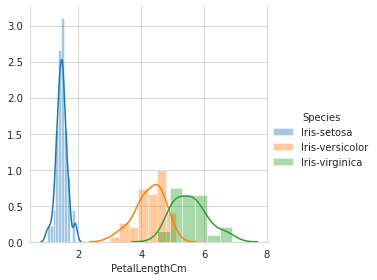

In [ ]:
sns.FacetGrid(iris_data,hue='Species',size=4).map(sns.distplot,"PetalLengthCm").add_legend()
plt.show()   

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


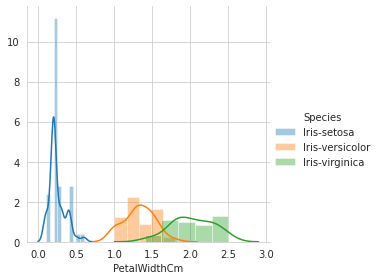

In [ ]:
sns.FacetGrid(iris_data,hue='Species',size=4).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()   

#Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x=iris_data.drop('Species',axis=1)
y=iris_data['Species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
model_dt=DecisionTreeClassifier(max_depth=5,random_state=42)

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred=model_dt.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_dt.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Decision Tree \n",classification_report(y_test,y_pred))

[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]
Train Accuracy : 100.0 %
Test Accuracy  : 97.368 %
classification report of Decision Tree 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38



[Text(200.88000000000002, 181.2, 'X[0] <= 101.0\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 50.5\ngini = 0.499\nsamples = 71\nvalue = [37, 34, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

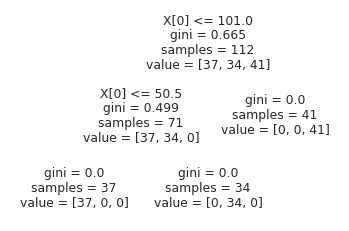

In [ ]:
from sklearn import tree
tree.plot_tree(model_dt)

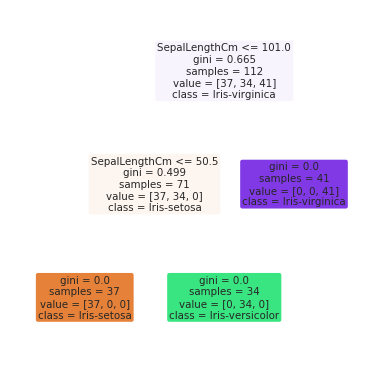

In [ ]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',]
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=150)
tree.plot_tree(model_dt,feature_names = features, class_names=classes,rounded = True,filled = True);
fig.savefig('tree.png')

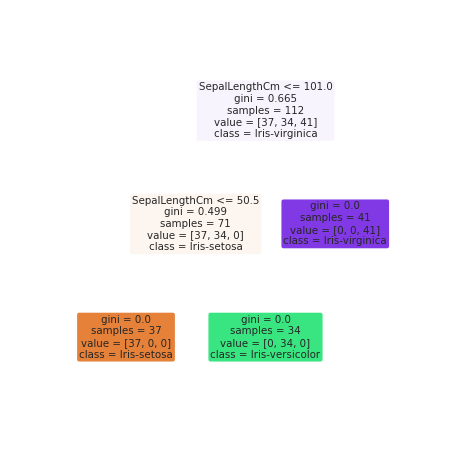

In [ ]:
from IPython.display import Image
Image(filename = 'tree.png')